In [1]:
# needs version >= 1.5 for full functionality
import tequila as tq 

In [2]:
#Initialize molecule
import tequila as tq
geomstring="structure/benzene.xyz"
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="sto-3g")
print(molecule)

<class 'tequila.quantumchemistry.psi4_interface.QuantumChemistryPsi4'>
Qubit Encoding
JordanWigner

Parameters
basis_set       : sto-3g          
geometry        : tequila-tutorials/chemistry/data/benzene.xyz 
description     : benzene CISD/3-21G equilibrium 
multiplicity    : 1               
charge          : 0               
name            : tequila-tutorials/chemistry/data/benzene 
frozen_core     : True            
n_qubits        : 60              
reference state : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Basis

IntegralManager:
ActiveSpace:
Active Space Data:
active_orbitals : [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] 
reference_orbitals : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] 
active_reference_orbitals : [6, 7, 8, 9, 10, 11, 1

In [3]:
#Molecular Orbitals and Point Groups
molecule.orbitals[3]

OrbitalData(irrep='B1G', idx_irrep=1, idx_total=9, idx=3, energy=-0.7629208008754432, occ=None, pair=None)

In [4]:
#Initialize the Qubit Hamiltonians
import tequila as tq
H = molecule.make_hamiltonian()
# The Benzene Hamiltonian is already quite large, better not print the full Hamiltonian
print("Hamiltonian has {} terms".format(len(H)))
print("Hamiltonian has {} qubits".format(H.n_qubits))

Hamiltonian has 165415 terms
Hamiltonian has 60 qubits


In [5]:
#The full Hamiltonian is too large. So, let's set the active space.
#Setting the Active Space
#Setting Active Space
import tequila as tq
import numpy
active_orbitals = {"AG":[0,1,2], "B1G":[0,1,2], "B2G":[0]}
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="sto-3g", active_orbitals=active_orbitals)
H = molecule.make_hamiltonian()
eigenValues = numpy.linalg.eigvalsh(H.to_matrix())
print("Hamiltonian has {} terms".format(len(H)))
print(H)
print(eigenValues)
print("lowest energy = ", eigenValues[0])

Hamiltonian has 105 terms
-223.2938+1.0722Z(0)+1.0722Z(1)+0.8703Z(2)-0.0394Y(2)Z(3)Y(4)-0.0394X(2)Z(3)X(4)+0.8703Z(3)-0.0394Y(3)Z(4)Y(5)-0.0394X(3)Z(4)X(5)+0.7111Z(4)+0.7111Z(5)+0.6656Z(6)+0.6656Z(7)+0.0892Z(0)Z(1)+0.0095Y(0)X(1)X(2)Y(3)-0.0095Y(0)Y(1)X(2)X(3)-0.0095X(0)X(1)Y(2)Y(3)+0.0095X(0)Y(1)Y(2)X(3)-0.0038Y(0)X(1)X(3)Y(4)-0.0038Y(0)Y(1)Y(3)Y(4)-0.0038X(0)X(1)X(3)X(4)-0.0038X(0)Y(1)Y(3)X(4)+0.0038Y(0)X(1)X(2)Z(3)Z(4)Y(5)-0.0038Y(0)Y(1)X(2)Z(3)Z(4)X(5)-0.0038X(0)X(1)Y(2)Z(3)Z(4)Y(5)+0.0038X(0)Y(1)Y(2)Z(3)Z(4)X(5)+0.0054Y(0)X(1)X(4)Y(5)-0.0054Y(0)Y(1)X(4)X(5)-0.0054X(0)X(1)Y(4)Y(5)+0.0054X(0)Y(1)Y(4)X(5)+0.0063Y(0)X(1)X(6)Y(7)-0.0063Y(0)Y(1)X(6)X(7)-0.0063X(0)X(1)Y(6)Y(7)+0.0063X(0)Y(1)Y(6)X(7)+0.0651Z(0)Z(2)-0.0082Z(0)Y(2)Z(3)Y(4)-0.0082Z(0)X(2)Z(3)X(4)+0.0746Z(0)Z(3)-0.0120Z(0)Y(3)Z(4)Y(5)-0.0120Z(0)X(3)Z(4)X(5)+0.0703Z(0)Z(4)+0.0756Z(0)Z(5)+0.0755Z(0)Z(6)+0.0818Z(0)Z(7)+0.0746Z(1)Z(2)-0.0120Z(1)Y(2)Z(3)Y(4)-0.0120Z(1)X(2)Z(3)X(4)+0.0651Z(1)Z(3)-0.0082Z(1)Y(3)Z(4)Y(5)-0.0082Z(1)X(

In [2]:
#Setting Active Space
import tequila as tq
import numpy
geomstring="structure/benzene.xyz"
active_orbitals = {"AG":[0,1,2], "B1G":[0,1], "B2G":[0], "B3G":[0], "AU":[0], "B1U":[0]}
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="sto-3g", active_orbitals=active_orbitals)
H = molecule.make_hamiltonian()
eigenValues = numpy.linalg.eigvalsh(H.to_matrix())
print("Hamiltonian has {} terms".format(len(H)))
print(H)
print(eigenValues)
print("lowest energy = ", eigenValues[0])

Hamiltonian has 247 terms
-222.8637+1.0794Z(0)+1.0794Z(1)+0.8743Z(2)+0.8743Z(3)+0.7218Z(4)+0.7218Z(5)+0.6616Z(6)+0.6616Z(7)+0.6465Z(8)+0.6465Z(9)+0.5132Z(10)+0.5132Z(11)+0.0892Z(0)Z(1)+0.0095Y(0)X(1)X(2)Y(3)-0.0095Y(0)Y(1)X(2)X(3)-0.0095X(0)X(1)Y(2)Y(3)+0.0095X(0)Y(1)Y(2)X(3)+0.0092Y(0)X(1)X(4)Y(5)-0.0092Y(0)Y(1)X(4)X(5)-0.0092X(0)X(1)Y(4)Y(5)+0.0092X(0)Y(1)Y(4)X(5)+0.0063Y(0)X(1)X(6)Y(7)-0.0063Y(0)Y(1)X(6)X(7)-0.0063X(0)X(1)Y(6)Y(7)+0.0063X(0)Y(1)Y(6)X(7)+0.0063Y(0)X(1)X(8)Y(9)-0.0063Y(0)Y(1)X(8)X(9)-0.0063X(0)X(1)Y(8)Y(9)+0.0063X(0)Y(1)Y(8)X(9)+0.0042Y(0)X(1)X(10)Y(11)-0.0042Y(0)Y(1)X(10)X(11)-0.0042X(0)X(1)Y(10)Y(11)+0.0042X(0)Y(1)Y(10)X(11)+0.0651Z(0)Z(2)-0.0028Y(0)Z(1)X(2)X(4)Z(5)Z(6)Z(7)Z(8)Z(9)Y(10)-0.0062Y(0)Z(1)Y(2)Y(4)Z(5)Z(6)Z(7)Z(8)Z(9)Y(10)-0.0034Y(0)Z(1)Y(2)X(4)Z(5)Z(6)Z(7)Z(8)Z(9)X(10)-0.0034X(0)Z(1)X(2)Y(4)Z(5)Z(6)Z(7)Z(8)Z(9)Y(10)-0.0062X(0)Z(1)X(2)X(4)Z(5)Z(6)Z(7)Z(8)Z(9)X(10)-0.0028X(0)Z(1)Y(2)Y(4)Z(5)Z(6)Z(7)Z(8)Z(9)X(10)+0.0000iY(0)Z(1)X(2)X(6)Z(7)Y(8)-0.0035Y(0)Z(

In [4]:
import tequila as tq
threshold = 1.e-6
active = {"B1u": [0], "B3g": [0, 1], "B2g": [0], "Au": [0], "b1u": [1]}
molecule = tq.quantumchemistry.Molecule(geometry=geomstring, basis_set='sto-3g', active_orbitals=active)
H = molecule.make_hamiltonian()

U = molecule.make_upccgsd_ansatz(name="UpCCGD")

# define the expectationvalue
E = tq.ExpectationValue(H=H, U=U)

# compute reference energies
mp2 = molecule.compute_energy("mp2")
cisd = molecule.compute_energy("detci", options={"detci__ex_level": 2})
fci = molecule.compute_energy("fci")

# optimize
result = tq.minimize(objective=E, method="BFGS", initial_values=0.0)

print("VQE : {:+2.8}f".format(result.energy))
print("MP2 : {:+2.8}f".format(mp2))
print("CISD: {:+2.8}f".format(cisd))
print("FCI : {:+2.8}f".format(fci))

There are known issues with some psi4 methods and frozen virtual orbitals. Proceed with fingers crossed for mp2.
Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
device          : None
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 30 expectationvalues

active variables : 15

E=-227.88792153  angles= {(((0, 1),), 'D', (None, 0)): 0.0, (((0, 2),), 'D', (None, 0)): 0.0, (((0, 3),), 'D', (None, 0)): 0.0, (((0, 4),), 'D', (None, 0)): 0.0, (((0, 5),), 'D', (None, 0)): 0.0, (((1, 2),), 'D', (None, 0)): 0.0, (((1, 3),), 'D', (None, 0)): 0.0, (((1, 4),), 'D', (None, 0)): 0.0, (((1, 5),), 'D', (None, 0)): 0.0, (((2, 3),), 'D', (None, 0)): 0.0, (((2, 4),), 'D', (None, 0)): 0.0, (((2, 5),), 'D', (None, 0)): 0.0, (((3, 4),), 'D', (None, 0)): 0.0, (((3, 5),), 'D', (None, 0)): 0.0, (((4, 5),), 'D', (None, 0)): 0.0}  samples= None
E=-227.91711515  angle

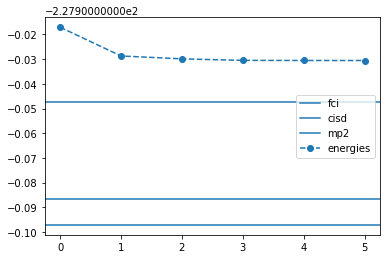

In [5]:
result.history.plot("energies", baselines={"fci":fci, "cisd": cisd, "mp2":mp2}, filename="benzene_result_bfgs")

In [6]:
import tequila as tq
threshold = 1.e-6
active = {"AG":[0], "B1u": [0], "B3g": [0, 1], "B2g": [0], "Au": [0], "b1u": [1]}
molecule = tq.quantumchemistry.Molecule(geometry=geomstring, basis_set='sto-3g', active_orbitals=active)
H = molecule.make_hamiltonian()

U = molecule.make_upccgsd_ansatz(name="UpCCGD")

# define the expectationvalue
E = tq.ExpectationValue(H=H, U=U)

# compute reference energies
mp2 = molecule.compute_energy("mp2")
cisd = molecule.compute_energy("detci", options={"detci__ex_level": 2})
fci = molecule.compute_energy("fci")

# optimize
result = tq.minimize(objective=E, method="BFGS", initial_values=0.0)

print("VQE : {:+2.8}f".format(result.energy))
print("MP2 : {:+2.8}f".format(mp2))
print("CISD: {:+2.8}f".format(cisd))
print("FCI : {:+2.8}f".format(fci))

There are known issues with some psi4 methods and frozen virtual orbitals. Proceed with fingers crossed for mp2.
Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
device          : None
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 30 expectationvalues

active variables : 15

E=-227.88792153  angles= {(((0, 1),), 'D', (None, 0)): 0.0, (((0, 2),), 'D', (None, 0)): 0.0, (((0, 3),), 'D', (None, 0)): 0.0, (((0, 4),), 'D', (None, 0)): 0.0, (((0, 5),), 'D', (None, 0)): 0.0, (((1, 2),), 'D', (None, 0)): 0.0, (((1, 3),), 'D', (None, 0)): 0.0, (((1, 4),), 'D', (None, 0)): 0.0, (((1, 5),), 'D', (None, 0)): 0.0, (((2, 3),), 'D', (None, 0)): 0.0, (((2, 4),), 'D', (None, 0)): 0.0, (((2, 5),), 'D', (None, 0)): 0.0, (((3, 4),), 'D', (None, 0)): 0.0, (((3, 5),), 'D', (None, 0)): 0.0, (((4, 5),), 'D', (None, 0)): 0.0}  samples= None
E=-227.91711515  angle

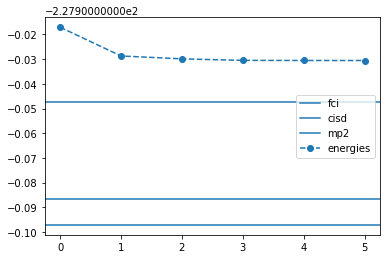

In [7]:
result.history.plot("energies", baselines={"fci":fci, "cisd": cisd, "mp2":mp2}, filename="benzene_result_bfgs")

In [8]:
import tequila as tq
threshold = 1.e-6
active = {"AG":[0,1,2], "B1G":[0,1], "B2G":[0], "B3G":[0], "AU":[0], "B1U":[0]}
molecule = tq.quantumchemistry.Molecule(geometry=geomstring, basis_set='sto-3g', active_orbitals=active)
H = molecule.make_hamiltonian()
         
U = molecule.make_upccgsd_ansatz(name="UpCCGD")

# define the expectationvalue
E = tq.ExpectationValue(H=H, U=U)

# compute reference energies
mp2 = molecule.compute_energy("mp2")
cisd = molecule.compute_energy("detci", options={"detci__ex_level": 2})
fci = molecule.compute_energy("fci")

# optimize
result = tq.minimize(objective=E, method="BFGS", initial_values=0.0)

print("VQE : {:+2.8}f".format(result.energy))
print("MP2 : {:+2.8}f".format(mp2))
print("CISD: {:+2.8}f".format(cisd))
print("FCI : {:+2.8}f".format(fci))

There are known issues with some psi4 methods and frozen virtual orbitals. Proceed with fingers crossed for mp2.
Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
device          : None
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 30 expectationvalues

active variables : 15

E=-227.88792153  angles= {(((0, 1),), 'D', (None, 0)): 0.0, (((0, 2),), 'D', (None, 0)): 0.0, (((0, 3),), 'D', (None, 0)): 0.0, (((0, 4),), 'D', (None, 0)): 0.0, (((0, 5),), 'D', (None, 0)): 0.0, (((1, 2),), 'D', (None, 0)): 0.0, (((1, 3),), 'D', (None, 0)): 0.0, (((1, 4),), 'D', (None, 0)): 0.0, (((1, 5),), 'D', (None, 0)): 0.0, (((2, 3),), 'D', (None, 0)): 0.0, (((2, 4),), 'D', (None, 0)): 0.0, (((2, 5),), 'D', (None, 0)): 0.0, (((3, 4),), 'D', (None, 0)): 0.0, (((3, 5),), 'D', (None, 0)): 0.0, (((4, 5),), 'D', (None, 0)): 0.0}  samples= None
E=-227.90073766  angle

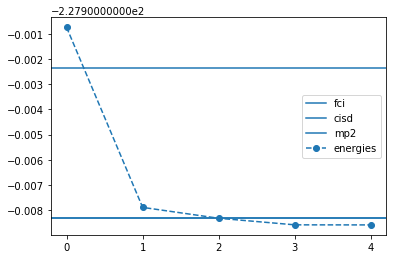

In [9]:
result.history.plot("energies", baselines={"fci":fci, "cisd": cisd, "mp2":mp2}, filename="benzene_result_bfgs")

In [16]:
import tequila as tq
threshold = 1.e-6
active = {"AG":[0,1,2], "B1G":[0,1,2], "B2G":[0], "B3G":[0], "AU":[0], "B1U":[0,1]}
molecule = tq.quantumchemistry.Molecule(geometry=geomstring, basis_set='sto-3g', active_orbitals=active)
H = molecule.make_hamiltonian()

U = molecule.make_upccgsd_ansatz(name="UpCCGD")

# define the expectationvalue
E = tq.ExpectationValue(H=H, U=U)

# compute reference energies
mp2 = molecule.compute_energy("mp2")
cisd = molecule.compute_energy("detci", options={"detci__ex_level": 2})
fci = molecule.compute_energy("fci")

# optimize
result = tq.minimize(objective=E, method="BFGS", initial_values=0.0)

print("VQE : {:+2.8}f".format(result.energy))
print("MP2 : {:+2.8}f".format(mp2))
print("CISD: {:+2.8}f".format(cisd))
print("FCI : {:+2.8}f".format(fci))

There are known issues with some psi4 methods and frozen virtual orbitals. Proceed with fingers crossed for mp2.
Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
device          : None
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 56 expectationvalues

active variables : 28

E=-227.88792153  angles= {(((0, 1),), 'D', (None, 0)): 0.0, (((0, 2),), 'D', (None, 0)): 0.0, (((0, 3),), 'D', (None, 0)): 0.0, (((0, 4),), 'D', (None, 0)): 0.0, (((0, 5),), 'D', (None, 0)): 0.0, (((0, 6),), 'D', (None, 0)): 0.0, (((0, 7),), 'D', (None, 0)): 0.0, (((1, 2),), 'D', (None, 0)): 0.0, (((1, 3),), 'D', (None, 0)): 0.0, (((1, 4),), 'D', (None, 0)): 0.0, (((1, 5),), 'D', (None, 0)): 0.0, (((1, 6),), 'D', (None, 0)): 0.0, (((1, 7),), 'D', (None, 0)): 0.0, (((2, 3),), 'D', (None, 0)): 0.0, (((2, 4),), 'D', (None, 0)): 0.0, (((2, 5),), 'D', (None, 0)): 0.0, (((

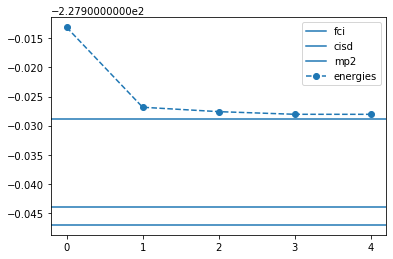

In [19]:
result.history.plot("energies", baselines={"fci":fci, "cisd": cisd, "mp2":mp2}, filename="benzene_result_bfgs")